In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import datasets
import seaborn as sns


In [17]:
# Load in our dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
y = iris.target

In [18]:
print(iris['target_names'])
print(iris['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


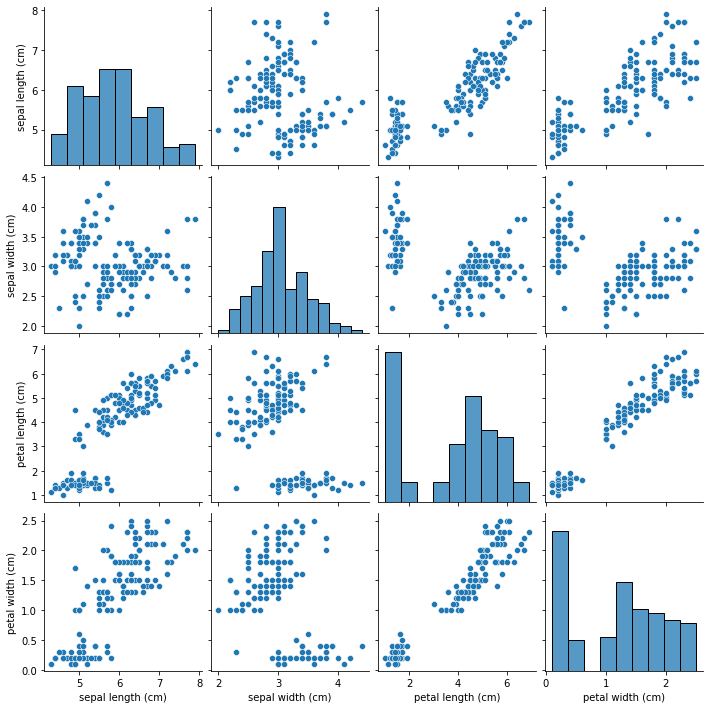

In [19]:
sns.pairplot(X)

In [31]:
# Do some quick Kmeans clustering with these features

# Standardise data to have mean ~0 and variance 1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)




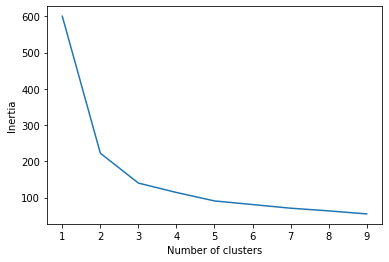

In [32]:
# Find number of clusters by minimising inertia
clusters = range(1, 10)
inertias = []

for cluster in clusters:
    # Create a Kmeans cluster
    kmeans = KMeans(n_clusters=cluster)

    # Fit to the samples
    kmeans.fit(X_std)

    # Append interias to list
    inertias.append(kmeans.inertia_)

plt.plot(clusters, inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(clusters)
plt.show()

Elbow point at n=3 suggests we should use this as our number of clusters, which makes sense, because there are 3 species of flower

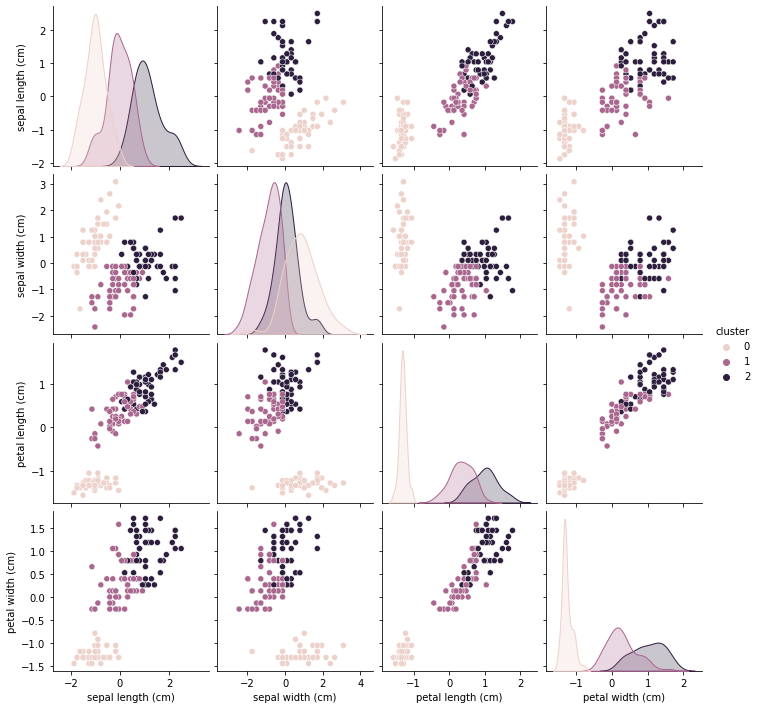

In [37]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X_std)

X_pred = pd.DataFrame(X_std, columns=iris['feature_names'])
X_pred['cluster'] = kmeans.labels_

X_std.head()
sns.pairplot(X_pred, hue='cluster')

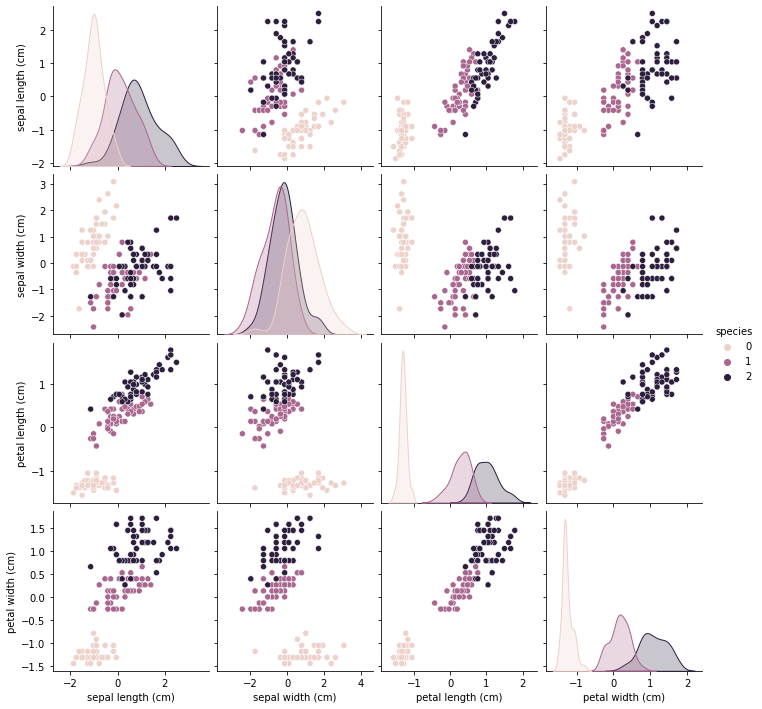

In [39]:
# Compare to ground truth
X_target = pd.DataFrame(X_std,  columns=iris['feature_names'])
X_target['species'] = y

sns.pairplot(X_target, hue='species')

In [41]:
# Numerical comparison between pred and target
accuracy_score(y, kmeans.labels_)

0.8333333333333334

In [ ]:
# TODO: PCA